# Tutorial for Running ELL on Ultra96

## Step 1. Import libraries

In [1]:
import sys
import os
import time
import cv2
from PIL import Image as PIL_Image
import tutorial_helpers as helpers

If you run into problems with the following import, make sure your 
Python module can be built successfully first.

In [2]:
import model

##  Step 2. ML inference

We now have a modified version of `get_image_from_camera()`.
We require the image to be captured from a USB camera.
The API allows us to discard the first few frames in order to 
get good frames only.

In [3]:
def get_image_from_camera(skip_frames):
    cap = cv2.VideoCapture(0)
    if cap.isOpened():
        for i in range(skip_frames):
            ret, frame = cap.read()
        if not ret:
            raise Exception("your capture device is not returning images")
    else:
        raise Exception("your capture device is not open")
    cap.release()
    return frame

In [4]:
with open("categories.txt", "r") as categories_file:
    categories = categories_file.read().splitlines()

In [5]:
input_shape = model.get_default_input_shape()

We will get the 5th frame from the camera.

In [6]:
image = get_image_from_camera(5)

In [7]:
input_data = helpers.prepare_image_for_model(
            image, input_shape.columns, input_shape.rows)

In [8]:
predictions = model.predict(input_data)

In [9]:
top_5 = helpers.get_top_n(predictions, 5)

In [10]:
header_text = ", ".join(["({:.0%}) {}".format(
            element[1], categories[element[0]]) for element in top_5])

In [11]:
helpers.draw_header(image, header_text)

The following cell is modified so it can work nicely inside Jupyter notebook.
We do not need the `imshow()` call from OpenCV.

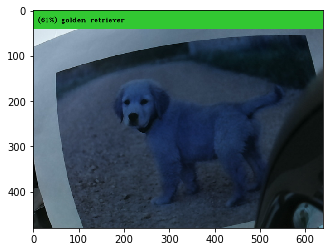

In [12]:
%matplotlib inline
from matplotlib.pyplot import imshow
imshow(image)